# Analiza cen avtomobilov
V analizi podatkov se bom osredotočil na dejavnike, ki vplivajo na ceno avtomobilov in predvsem na kakšen način vplivajo na ceno (eksponentno, linearno, kvadratno...). Avtomobile bomo identificirali z njihovo registrsko številko VIN (ker so bili vsi podatki zajeti istočasno, 2 avtomobila ne moreta imeti iste registrcije). Raziskujemo 3 najbolj prodajane znamke Audi, BMW in Mercedes-Benz.

### Namen analize podatkov
Cilj analize je, da na model vpeljemo metodo _Linear regression_, da bi lahko s podatki naredili model, ki najbolje oceni, kakšna cena avtomobila bi morala biti. Večinoma bomo predvideval, da so podatki med seboj neodvisni, torej, da je odvisnost med ceno in podatkom A enaka, pri pogoju, da ima ta avtomobil lastnost B; torej da se ne more zgoditi, da bi pri modelu Audi cena naraščala s časom, pri BMW pa padala (primer je sicer očiten, a se bi manj absurdni primeri lahko dogajali).

In [162]:
import pandas as pd
import numpy as np

In [53]:
cars = pd.read_csv("pociscen_cars.csv", index_col="VIN")
cars

,year,znamka,model,state,city,price,miles,accidents,use,owners,MPG_city,MPG_highway,engine,transmission,drive_type,exterior,interior
VIN,,,,,,,,,,,,,,,,,
WDBSK75F93F021261,2003,mercedes-benz,sl,CA,San Diego,9999,91284,0,Personal,4,15,22,5.0L V-8 Gas,Automatic,RWD,Silver,Unknown
WDDHF8JB6EA869273,2014,mercedes-benz,e-class,FL,Tampa,14995,102589,0,Personal,3,21,29,3.5L V-6 Gas,Automatic,AWD,White,Unknown
WDBSK75F13F014465,2003,mercedes-benz,sl,IL,Downers Grove,14888,55988,0,Personal,4,15,22,5.0L V-8 Gas,Automatic,RWD,Black,Unknown
WD4PF0CD3KP053996,2019,mercedes-benz,sprinter-crew-van,TX,Webster,39999,51311,0,Fleet,1,0,0,3.0L V-6 Diesel Turbocharged,Automatic,RWD,Gray,Black
WD3PF1CDXJP626790,2018,mercedes-benz,sprinter-chassis-cab,VA,Fredericksburg,49000,34262,0,Personal,1,0,0,3.0L V-6 Diesel Turbocharged,Automatic,RWD,White,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WAUC8AFC4JN051922,2018,audi,a6,IN,Indianapolis,27500,77775,0,Personal,2,25,34,2.0L Inline-4 Gas Turbocharged,Automatic,FWD,White,Black
WA1B4AFY9L2124495,2020,audi,sq5,TX,McKinney,46999,21868,0,Personal,1,18,23,3.0L V-6 Gas Turbocharged,Automatic,AWD,Gray,Black
WA1EECF39M1051470,2021,audi,q3,MD,Rockville,41998,19943,0,Personal,1,20,28,2.0L Inline-4 Gas Turbocharged,Automatic,AWD,White,Gray


Raziščimo najprej nekaj osnovnih informacij o ceni, ki jih bomo v nadaljevanju uporabljali pri raziskavi cen. Ker smo izbrali podobni cenovni razred, se ne bomo ukvarjali z znamko, saj se avtomobili bolj razlikujejo zaradi modela avtomobila. Spodaj je prikaz, da znamka ne vpliva drastično, tudi če pa se ta odvistnost še vedno upošteva pri modelu.

<AxesSubplot:xlabel='znamka'>

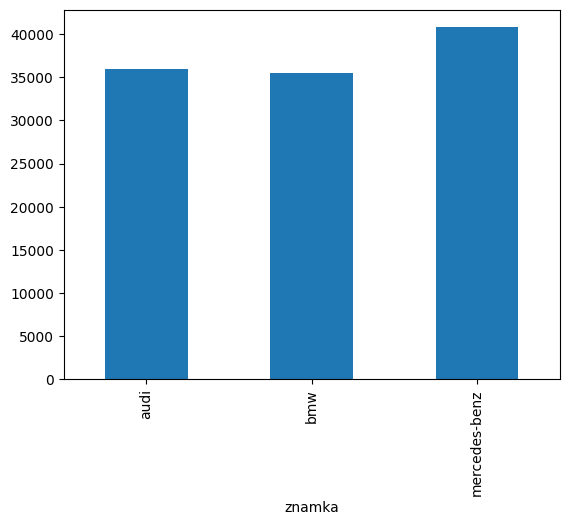

In [56]:
cars.groupby("znamka").price.mean().plot(kind="bar")

Poglejmo najprej odvisnost cene od porabe. Ker imajo električni avtomobili drugačen način izračuna, pogledamo avtomobile, ki imajo manjšo porabo od 40 in večji od 0 (ti niso električni).

<AxesSubplot:xlabel='MPG_city', ylabel='price'>

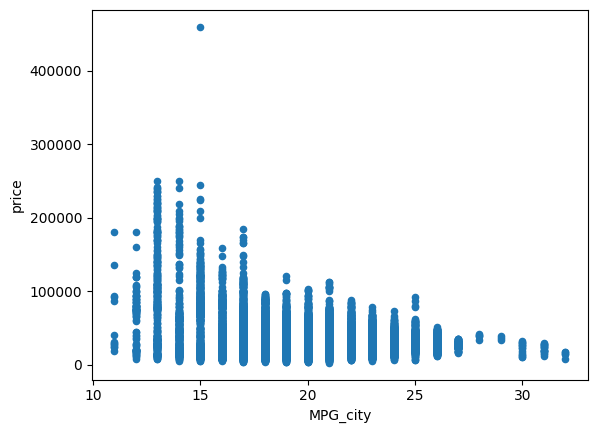

In [63]:
cars[(cars.MPG_city > 0) & (cars.MPG_city < 40)].plot.scatter(x='MPG_city', y='price')

Tudi ta podatek je očitno odvisen tudi od modela. Posvetimo se ocenjevanju modela. Zanima nas, kakšno ima odvisnost cena od modela. 

<AxesSubplot:xlabel='model', ylabel='price'>

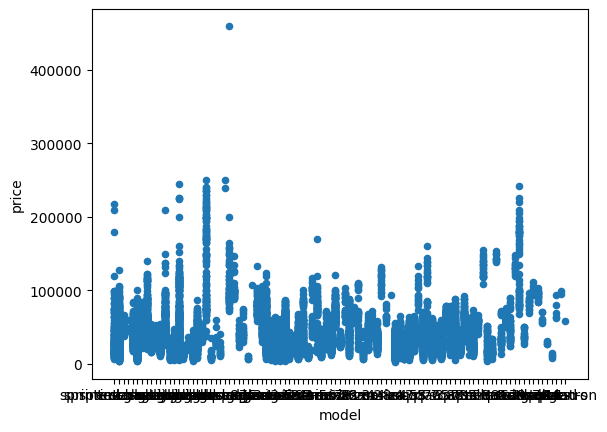

In [73]:
cars.plot.scatter(x='model', y='price')

Sklepamo lahko, da bodo nekateri modeli dražji od drugih ne glede na lastnosti (starost, nesreče...), torej lahko predvidevamo, da imajo neko "začetno vrednost", potem pa se drugi z nekim koeficientom razrezajo po nekem razponu na nekem intervalu. Ker v model _Linear regression_ ne bomo vstavljali modela, saj to ni numberična vrednost, bomo pred tem za vsak model izračunali začetno vrednost in koeficint, ki ga bo potem podala _Linear regression_. Naša hipoteza je torej, da $f_{kn}(x) = kx + n$, kjer je $f_{kn}$ odvisen od modela.

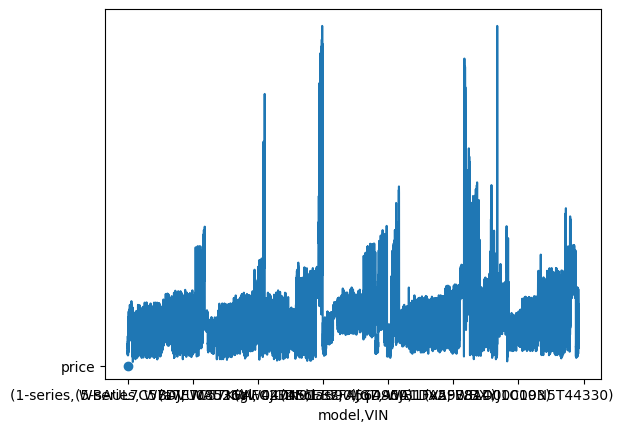

In [115]:
cars_grouped = cars.groupby("model")["price"]
cars_avg = cars_grouped.mean()
cars_std = cars_grouped.std()
filtered_cars = cars_grouped.apply(lambda x: x[~((x > x.mean() + 2 * x.std()) | (x < x.mean() - 2 * x.std()))])
# Na vsak element cars_grouped, ki je DataFrame, apply-jamo funkcijo, ki sfiltrira tiste, ki preveč odstopajo od povprečja; bolj kot drugi
filtered_cars.plot().scatter(x="model", y="price")

In [123]:
def min_max_price(model):
    filtered_cars_model = cars_grouped.get_group(model)
    return filtered_cars_model.min(), filtered_cars_model.max()
min_max_price("a6")

(5499, 62382)

Zdaj lahko naredimo novo tabelo, kjer vsaj malo upoštevamo model. Vse cene bomo normalizirali tako, da bomo ceni avtomobila odšteli najmanjšo ceno in nato delili z razonom, ki ga ima specifičen model avtomobila. Potem bomo lahko vsako lastnost rabljenega avtomobila ocenili in tudi tiste lastnosti linearizirali.

In [142]:
def normaliziraj_ceno(cena, model):
    min, max = min_max_price(model)
    k = max - min
    return (cena - min) / k

cars["age"] = cars['year'].apply(lambda x: 2022 - x)
cars["nor_price"] = cars.apply(lambda row: normaliziraj_ceno(row["price"], row["model"]), axis=1)
cars_useful_info = cars[["model", "miles", "accidents", "age", "owners", "nor_price"]]
cars_useful_info


/var/folders/1s/tcdbpyk50fj_5h8_xchrln2r0000gn/T/ipykernel_10857/1148804842.py:4: RuntimeWarning: invalid value encountered in long_scalars
  return (cena - min) / k


,model,miles,accidents,age,owners,nor_price
VIN,,,,,,
WDBSK75F93F021261,sl,91284,0,19,4,0.019095
WDDHF8JB6EA869273,e-class,102589,0,8,3,0.091041
WDBSK75F13F014465,sl,55988,0,19,4,0.042150
WD4PF0CD3KP053996,sprinter-crew-van,51311,0,3,1,0.071566
WD3PF1CDXJP626790,sprinter-chassis-cab,34262,0,4,1,0.290883
...,...,...,...,...,...,...
WAUC8AFC4JN051922,a6,77775,0,4,2,0.386776
WA1B4AFY9L2124495,sq5,21868,0,2,1,0.626456
WA1EECF39M1051470,q3,19943,0,1,1,0.857131


Z normalizirano ceno pogledamo odvisnost od prevoženih kilometrov, nesreč, število nesreč...

<AxesSubplot:xlabel='accidents'>

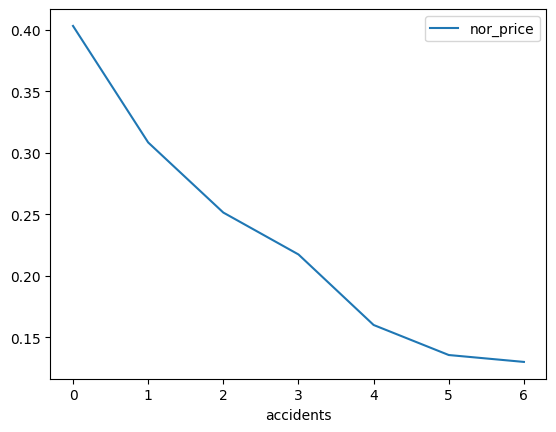

In [158]:
cars_useful_info[["accidents", "nor_price"]].groupby("accidents").mean().plot()

<AxesSubplot:xlabel='age'>

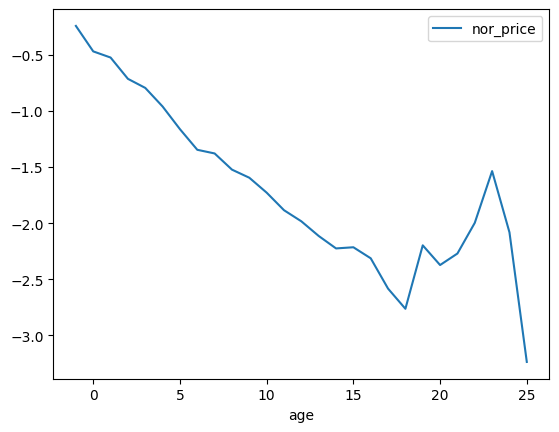

In [169]:
cars_useful_info[["age", "nor_price"]].groupby("age").mean().apply(np.log).plot()

<AxesSubplot:xlabel='owners'>

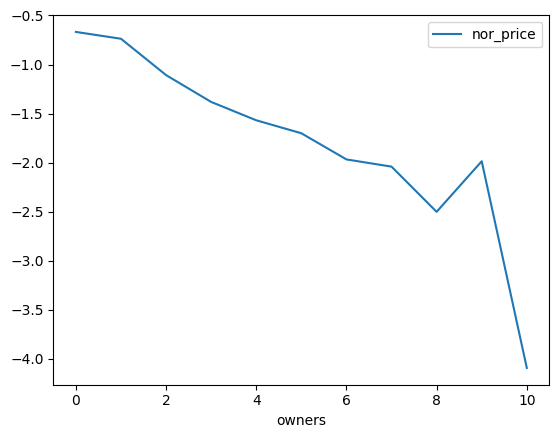

In [168]:
cars_useful_info[["owners", "nor_price"]].groupby("owners").mean().apply(np.log).plot()

Zgoraj so prikazani podatki, ki jih bomo uporabljali v algoritmu za ugotavljanje cene, vse so najbolj prilagojene linearizaciji (na dvej je vrednost podana v logaritmu, saj je rast eksponentna).